
## LIME

The LIME (Local Interpretable Model-agnostic Explanations) library in Python is used to explain the predictions of any machine learning classifier in an interpretable and faithful manner, by learning an interpretable model locally around the prediction. It helps users understand why a model made a certain prediction for a specific instance.


model-agnostic - meaning it can be applied to any ML/DL models, doesn't depend on model's interanl structure. treats models as black box

 
 ### Step-by-Step Working of LIME

![LIME Illustration](lime-2.png)



 
 1. **Select the Instance to Explain:**  
    Choose a specific data point (instance) for which you want to understand the model's prediction.
 
 2. **Perturb the Data:**  
    Generate a set of new samples by slightly modifying (perturbing) the selected instance. For tabular data, this could mean randomly changing feature values; for text, removing or replacing words; for images, turning off superpixels.
 
 3. **Predict with the Black-Box Model:**  
    Use the original (black-box) model to predict the output for each of the perturbed samples. Perturbed sample data will have prediction in both classes(in binary class)
 
 4. **Weight the Samples:**  
    Assign higher weights to perturbed samples that are more similar to the original instance. This ensures the explanation focuses on the local neighborhood of the instance.
 
 5. **Fit an Interpretable Model Locally:**  
    
    Train a simple, interpretable model (such as a linear regression or decision tree) on the perturbed samples and their predictions, using the assigned weights.
 
 6. **Extract Feature Importances:**  
    The coefficients or feature importances from the local surrogate model indicate which features contributed most to the prediction for the selected instance.
 
 7. **Present the Explanation:**  
    Display the most influential features and their contributions, providing a human-understandable explanation for the model's prediction on that specific instance.


# Interpreting LIME results

In [2]:
pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 11.5 MB/s  0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [pandas]2m2/3 [pandas]
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install --upgrade ipython jupyter

  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
  Using cached anyio-4.11.0-py3-none-any.whl.metadata (4.1 kB)
  Using cached certifi-2025.8.3-py3-none-any.whl.metadata (2.4 kB)
  Using cached httpcore-1.0.9-py3-none-any.whl.metadata (21 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached h11-0.16.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached sniffio-1.3.1-py3-none-any.whl.metadata (3.9 kB)
  Using cached jsonpointer-3.0.0-py2.py3-none-any.whl.metadata (2.3 kB)
  Using cached charset_normalizer-3.4.3-cp313-cp313-macosx_10_13_universal2.whl.metadata (36 kB)
  Using cached urllib3-2.5.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached typing_extensions-4.15.0-py3-none-any.whl.metadata (3.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB

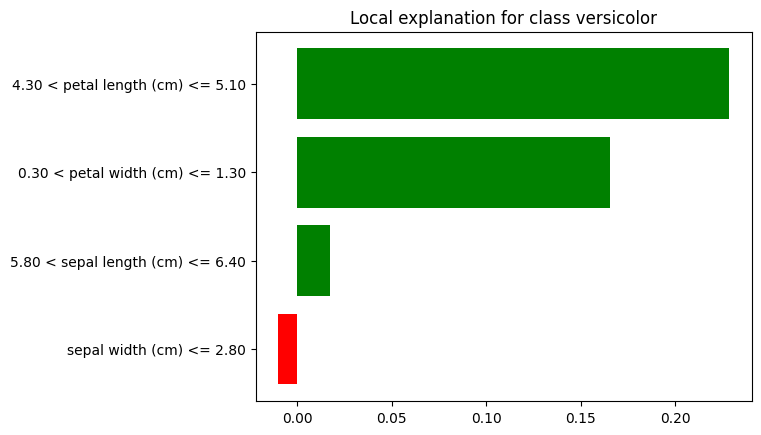

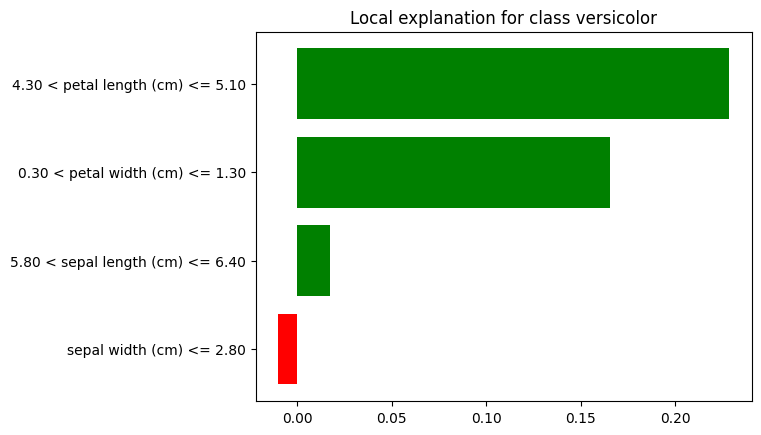

In [14]:
# Example: Using LIME to Explain a Prediction on Tabular Data

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import lime
import lime.lime_tabular

# Load dataset and train a model
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Choose an instance to explain
i = 0
instance = X_test[i]

# Create LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train,
    feature_names=feature_names,
    class_names=class_names,
    discretize_continuous=True
)

# Explain the prediction for the selected instance
exp = explainer.explain_instance(
    instance, 
    rf.predict_proba, 
    num_features=4, 
    top_labels=1
)


# Show explanation in notebook
exp.as_pyplot_figure()



# Interpreting the result:
# The explanation will display the most influential features for the model's prediction on this instance.
# Each feature's contribution (positive or negative) to the predicted class probability is shown.
# For example, if "petal width (cm) > 1.75" has a large positive weight for class "virginica",
# it means this feature strongly supports the prediction of "virginica" for this sample.



### LIME vs SHAP

 LIME (Local Interpretable Model-agnostic Explanations) and SHAP (SHapley Additive exPlanations) are both popular tools for explaining machine learning model predictions, but they differ in their approach and theoretical foundations.

 - **LIME** explains individual predictions by approximating the model locally with an interpretable model (like a linear model), focusing on the neighborhood of the instance being explained. It perturbs the input data and observes the resulting changes in predictions to fit a simple model that mimics the complex model locally.

 - **SHAP** is based on cooperative game theory and computes Shapley values, which fairly attribute the contribution of each feature to the prediction. SHAP provides a unified measure of feature importance that is consistent and has strong theoretical guarantees.

 **Key Differences:**
 - LIME uses local surrogate models, while SHAP uses Shapley values from game theory.
 - SHAP values are theoretically guaranteed to be consistent and additive, while LIME is more heuristic.
 - SHAP can be more computationally intensive but provides global and local explanations, whereas LIME is primarily local.

 In summary, both are useful for model interpretability, but SHAP provides more theoretically sound and consistent explanations, while LIME is often faster and easier to apply for local interpretability.



 ### Use Cases for LIME
 
 LIME is particularly useful in the following scenarios:
 
 - **Model Debugging:** Helps data scientists and engineers understand why a model made a specific prediction, making it easier to identify errors, biases, or unexpected behaviors in the model.
 
 - **Regulatory Compliance:** In industries like finance and healthcare, regulations may require explanations for automated decisions. LIME can provide interpretable justifications for individual predictions.
 
 - **Building Trust:** By offering clear, local explanations, LIME helps build trust with stakeholders, end-users, and domain experts who may be skeptical of black-box models.
 
 - **Feature Importance Analysis:** LIME can highlight which features are most influential for a particular prediction, guiding feature engineering and model refinement.
 
 - **Model Comparison:** When evaluating multiple models, LIME can be used to compare how different models arrive at their predictions for the same instance.
 
 - **Detecting Data Drift or Concept Drift:** By explaining predictions over time, LIME can help detect when the model's behavior changes due to shifts in data distribution.
 
 - **Explaining Predictions on Tabular, Text, and Image Data:** LIME supports a variety of data types, making it versatile for use in different domains such as tabular data (e.g., credit scoring), text classification (e.g., sentiment analysis), and image classification (e.g., medical imaging).




 ### Pros and Cons of LIME
 
 **Pros:**
 - Model-agnostic: Can be used with any machine learning or deep learning model, regardless of its internal structure.
 - Local interpretability: Provides explanations for individual predictions, helping users understand specific model decisions.
 - Easy to use: Simple API and quick to apply to new models and datasets.
 - Flexible: Supports tabular, text, and image data.
 
 **Cons:**
 - Instability: Explanations can vary significantly with different runs due to random sampling of perturbed data.
 - Locality: Only explains predictions locally; does not provide global model interpretability.
 - Heuristic approach: Lacks the strong theoretical guarantees of methods like SHAP.
 - Computational cost: Can be slow for large datasets or complex models, as it requires many model evaluations for each explanation.
